---
# <font color = red> Projet Isomorphisme </font>
---

<font color = yellow> *binôme : De l'estourbeillon Joesph | Le Gourrierec Alan* </font>

Durant ce projet, nous allons exploiter les divers manière de détecter un **isomorphisme** entre deux graphes. Notre but est de trouver les manières de détecter le plus rapidement possible si deux graphes sont isomorphes ou non. Nous allons donc essayer de mettre en place des algorithmes optimisés au maximum pour déterminner au plus vite un isomorphisme.

---

### <font color = green> Introduction </font>

Quelle est le but de ce projet, quelles sont les utilisation de l'isomorphisme dans le monde contemporais ?

Le but de ce projet est dans un premier temps de nous faire comprendre ce qu'est un isomorphisme par le biais de déterminer si deux graph son ou ne son pas pas isomorphe. Il existe pour se faire divers crtières, nous allons en utiliser 7 comme vous le verez au long de ce compte rendu, bien sur il existe plus de méthode pour les résoudres et nous ne pouvons pas résoudre tout les cas d'isomorphisme ... <br> 
Nous nous sommes dans un premier temps renseigné sur les divers formes d'isomorphisme dont la premieère qui est celle de la chimie et possède d'après nous deux types majoritaire d'isomorphisme :
- isomorphisme comme nous allons le traiter dans ce compte rendu, les isomorphisme en géométrie plan
- isomorphisme spaciale, les isomorphisme en géométrie spaciale

Dans la chimie déterminer si oui ou non deux molécule son isomorphe peu beaucoup affecter les recherches. Si elles ne le sont pas, par exmple, l'une des deux molécules possèderas sans doute une plus grande stabilité que l'autre. <br>
Ce n'est pas le domaine ou est présent l'isomorphisme, il y à aussi, par exmple, la cryptographie avec les courbes éliptiques, l'algèbre et l'algèbre linéaire et certains autres. Nous allons dans notre cas nous intéréssé à son application en théorie des graphs

Nous utiliserons les librairies suivantes pour faire fonctionner les différents algorithmes présentés par la suite :

In [2]:
import networkx as nx
import numpy as np
import random as rng
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')

---
## <font color = purple> Génération des exemples </font>

Dans un premier temps, nous allons générer les divers exemples que nous allons utiliser pour pourver le bon fonctionnement des programmes :
- un graph complet
- un graph chemin
- un graph taureau
- un graph aléatoire

Ceci nous permettra d'avoir des exemples dans les cas les plus extrêmes (pour chemin ou encore complet). Ces programe ne sont pas concu pour des multi-graph.

### <font color = purple> Graph complet </font>


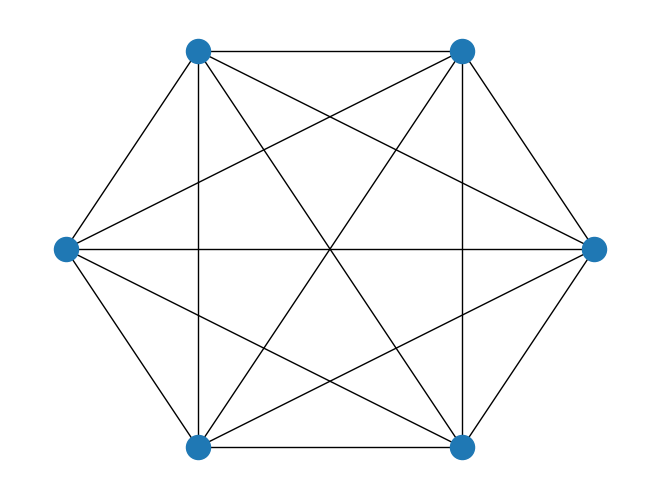

In [3]:
C = nx.complete_graph(6)
pos = nx.circular_layout(C)
nx.draw(C,pos=pos)
C = nx.to_numpy_array(C)

### <font color = purple> Graph Chemin </font>

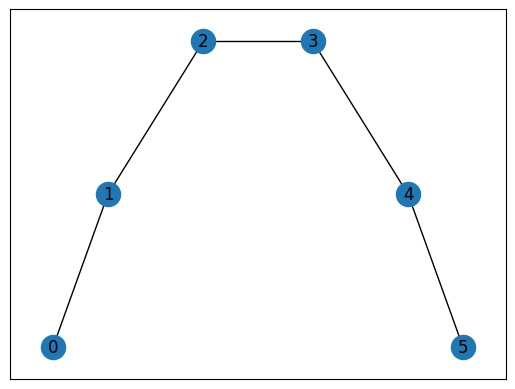

In [85]:
P = nx.path_graph(6)
pos = nx.spectral_layout(P)
nx.draw_networkx(P,pos=pos)
P = nx.to_numpy_array(P)

### <font color = purple> Graph taureau </font>

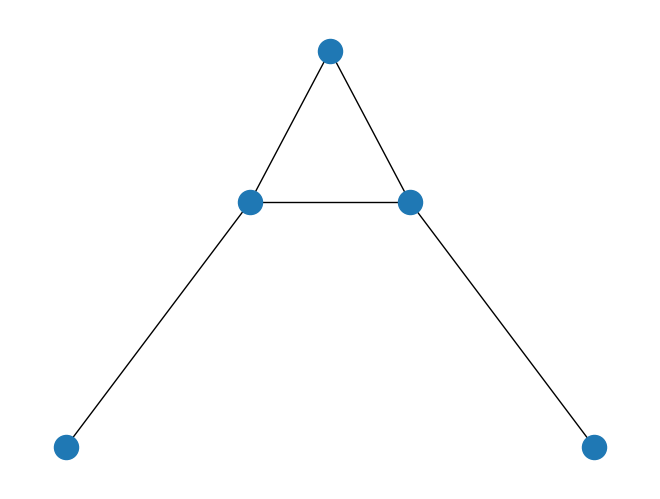

In [84]:
T = nx.bull_graph()
pos = nx.spectral_layout(T)
nx.draw(T,pos=pos)
T = nx.to_numpy_array(T)

### <font color = purple> Graph aléatoire </font>

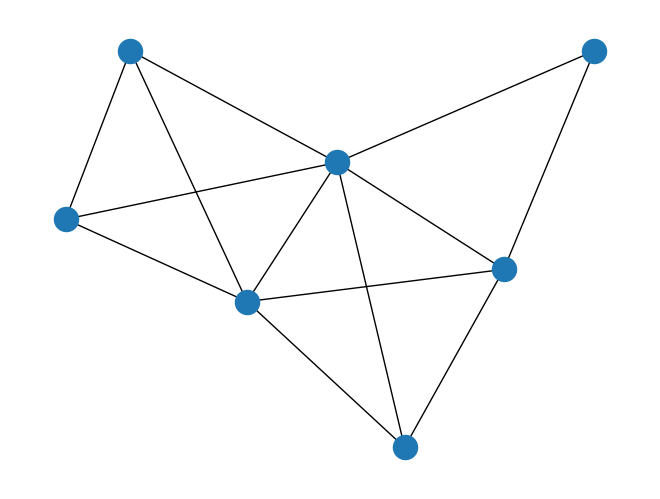

In [60]:
size = 7

def aleatoire(size):
    R = np.zeros((size,size))
    condition = False
    while condition != True:
        somme = 0
        for i in range(size):
            for j in range(size):
                if i != j :
                    R[i][j] = rng.randrange(2)
                    R[j][i] = R[i][j]
        for i in range(size):
            somme += max(R[i])

        if somme == size:
            return R
        
R = aleatoire(size)
nx.draw(nx.from_numpy_array(R))

## <font color = green> Fonctions utiles </font>

### <font color = green> Convertion Matrice d'Adjacence -> Matrice Laplacienne </font>

Nous allons ajouter une fonction qui permet de convertir une matrice d'adjacence en matrice laplacienne : 

In [7]:
# Matrice laplacienne : 
def laplacienne(A):
    # La fonction suite_degre est définie par la suite
    D = np.diag(suite_Degre(A)) * np.identity(A.shape[0])
    L = D - A
    return L

## <font color = orange> Algorithmes pour la recherche de graphes isomorphes </font>

Maintenant que nous avons généré les exemples, nous allons attaquer le vif du sujet en présentant les différentes manières de trouver l'isomorphisme simplement. Nous savons que deux graphes ne sont pas isomorphes si ils n'ont pas les mêmes : 
- tailles et ordres,
- suites de degré,
- spectres,
- diamètres et rayons (excentricité),
- théorèmes des triangles,
- plus grand cycle.

Nous allons donc développer des algorithmes permettant de vérifier ces six critères.

### <font color = orange> Taille et ordre </font>
Dans un premier temps, nous allons créer le programme qui nous semblait le plus simple, la vérification de la `taille` et l'`ordre`.
- Pour trouver l'ordre d'un graphe, il suffit de compter le nombre de colonne ou de ligne de sa matrice d'adjacence.
- Pour obtenir la taille d'un graphe, il faut calculer la trace de cette matrice et la diviser par 2. En effet, la trace est la somme des arêtes de chaque sommet, or une arête à deux extrémités, donc automatiquement la trace renvoie deux fois plus d'arêtes qu'il n'y en a réellement, et c'est pour cela qu'il est nécessaire de diviser la trace par 2.

In [8]:
def meme_Ordre(M,N):
    return np.shape(M)[0]==np.shape(N)[0]

def meme_Taille(M,N):
    return np.trace(M)/2==np.trace(N)/2

In [9]:
# Exemples : 

### <font color = orange> Suite de Degrés </font>

La deuxième chose à vérifier est la suite de degré de chaque matrice. En effet, c'est assez simple à trouver, puisqu'il suffit de compter le nombre d'arête qu'a chaque sommet. Il faut ensuite vérifier si les listes obtenues pour chacune des deux matrices sont identiques (l'ordre des listes ne compte pas, on peut par exemple les triées par ordre croissant pour faciliter la comparaison).

In [61]:
def suite_Degre(M):
    degre = []
    for i in M:
        n = sum(i)
        degre.append(n)
    return degre

def meme_Degre(M,N):
    degM = suite_Degre(M)
    degN = suite_Degre(N)
    degM.sort()
    degN.sort()
    return degM==degN

In [11]:
# Exemples

I = np.array([[0,1,1,0,0,0],
     [1,0,0,1,1,1],
     [1,0,0,0,0,1],
     [0,1,0,0,1,0],
     [0,1,0,1,0,0],
     [0,1,1,0,0,0]])
suite_Degre(I)

[2, 4, 2, 2, 2, 2]

In [62]:
print(suite_Degre(C))

[5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


### <font color = orange> Spectre </font>

Par la suite, une autre vérification peut être faite, cependant celle-ci est plus complexe à la main. En effet, l'opération consiste à vérifier si les spectres des deux matrices sont identiques. Si ils sont différents, alors on en conclu directement que les graphes ne sont pas isomorphes, d'après le lemme du théorème spectral. Mais, si ils sont identiques, on ne peut pas conclure directement que les graphes sont isomorphes.

In [12]:
# Spectre
def spectre(M):
    s = np.linalg.eigvals(M)
    modif_s = []
    for i in s :
        if i<10**(-10):
            modif_s.append(0)
        else:
            modif_s.append(round(i,5))
    return modif_s

def meme_Spectre(M,N):
    spM = spectre(M)
    spM.sort()
    spN = spectre(N)
    spN.sort()
    # print("   -",spM,"\n","  -",spN)
    return spM == spN


# La somme des valeurs propres vaut tr A.
# Le produit des valeurs propres vaut det A


In [13]:
# Exemple :

# 1 : Même spectres ->

# 2 : Spectres différents ->

# 3 : Même spectre, mais non isomorphes ->
I = np.array([[0,1,1,0,0,0],
     [1,0,0,1,1,1],
     [1,0,0,0,0,1],
     [0,1,0,0,1,0],
     [0,1,0,1,0,0],
     [0,1,1,0,0,0]])
J = np.array([[0,1,1,0,0,0],
     [1,0,0,1,0,1],
     [1,0,0,1,0,1],
     [0,1,1,0,1,0],
     [0,0,0,1,0,0],
     [0,1,1,0,0,0]])

print("Ordre   : ",meme_Ordre(I,J))
print("Taille  : ",meme_Taille(I,J))
print("Degré   : ",meme_Degre(I,J))
print("   - Suite de degré de I : ",suite_Degre(I))
print("   - Suite de degré de J : ",suite_Degre(J))
print("Spectre : ",meme_Spectre(laplacienne(I),laplacienne(J)))

Ordre   :  True
Taille  :  True
Degré   :  False
   - Suite de degré de I :  [2, 4, 2, 2, 2, 2]
   - Suite de degré de J :  [2, 3, 3, 3, 1, 2]
Spectre :  True


### <font color = orange> Excentricité </font>

Pour vérifier l'excentricité d'une matrice, nous utilisons le fait que lorsque nous mettons cette matrice à une certaine puissance, comme 2, nous obtenons l'entièreté des sommets atteignables avec des chemins de longueur 2, pour 3 ceux atteignables avec des chemins de longueurs 3, ... <br>
Nous allons donc réaliser une fonction 'Excentricity' qui s'arrête lorsque la puissance est égale à l'ordre de la matrice (car si nous continuons, nous retournerons sur nos pas).

La fonction nous renvoie donc la liste des excentricités pour chaque sommet (nous ne prenons pas en compte les multigraph donc nous ne pouvons pas avoir de valeurs infinies).

In [14]:
def Excentricity(matrice):
    n = np.shape(matrice)[0]
    result = np.zeros(n)
    tmp = np.identity(n)
    matrice = matrice + tmp
    
    for amount in range(n):
        tmp = np.matmul(tmp,matrice)
        
        # nous regardons si toutes les lignes de notre matrice sont bien non null
        for i in range(n): 
            if int(min(tmp[i])) > 0 and result[i] == 0: 
                result[i] = amount + 1
    
    return result       

def meme_Excentricity(M,N):
    extM = Excentricity(M)
    extM.sort()
    extN = Excentricity(N)
    extN.sort()
    return np.array_equal(M,N)


# Excentricité du graphe taureau :  
print(type(Excentricity(T)))

<class 'numpy.ndarray'>


### <font color = orange> Théorème des Triangles </font>

Nous avons aussi essayer de faire un algorithme pour déterminer les mailles, mais celui-ci, avec diverse discution avec des camarades de classe nous semblais casiment impossible à réaliser et/ou ne nous ferais que résoudre 1% des cas suplémentaire en augmentant la complexité de façons drastique.
J'ai donc décider d'utiliser le `théorèmes des triangles` qui dit :
"chaque graph isomorphe possède le même nombre de tirangle".<br>
Pour résoudre ceci, nous allons donc simplement utiliser : $\frac{tr(Matrice^3)}{6}$, Ceci nous permet donc d'obtenir tout les triangle, **sans** répétition, car les matrice d'adjacense sont symétrique $\rightarrow$ nous devons diviser par 2. <br>
Il y a aussi 3 manière de représenter un triangle ABC : ABC, BCA, CAB $\rightarrow$ nous divisons donc par 3. <br>
Pour finir, nous métons la matrice au cube, comme pour l'excentricité, pour savoir si nous retombons au troisième coup sur notre position initiale.


In [15]:
def Triangle(matrice):
    matrice = np.linalg.matrix_power(matrice,3)
    trace = np.trace(matrice)
    return trace/6

def meme_nbrTriangle(M,N):
    return Triangle(M)==Triangle(N)

print(Triangle(T))

1.0


### <font color = orange> Plus grand cycle </font>

Afin de réunir un paramètres de plus, nous avons réalisé un algorithme permetant de déterminer le cycle le plus long. Pour se faire, nous utilisons le programme suivant avec la fonction 'MaxCycle'. Pour se faire, nous essayons tout les cas possibles, si ceci ne forment pas un cycle alors nous arrêtons et recommençons au point suivant et ainsi de suite. Nous renvoyons donc la valeur maximale. 

In [16]:
from itertools import permutations

def MaxCycle(matrice):
    n = len(matrice)
    
    for taille in range(n, 2, -1):
        for perm in permutations(range(n), taille):
            cycle = list(perm)
            cycle += [cycle[0]] 
            
            est_cycle = True
            for i in range(taille):
                if matrice[cycle[i]][cycle[i+1]] != 1:
                    est_cycle = False
                    break
            
            if est_cycle:
                return max(cycle)+1
    return []

def meme_MaxCycle(M,N):
    return MaxCycle(M) == MaxCycle(N)


### <font color = orange> Liste des cycles </font>

Cette algo n'as pas été réalisé car jugé trop complexe par nous et surtout ce serais un algorithme avec une très grande complexité, il serait donc pas utilisable viable alors qu'il ne permetrais de résoudre que probablement 1% des cas en plus.
Cette algorihme d'après nous serais de complexité n⁴ (une **très** forte complexité) car il faut prendre en compte tout les chemins, en partant de chaques points, stoquer ces chemins ensuite il faut donc retourner la quantité de chaque cycles et vérifier qu'ils ne sont pas en plusieurs exemplaires (bon ca c'est pas spécialement difficile, il nous suffit de diviser chaque résultat de la manières suivante : $\frac{quatité de cycle}{2 * taille du cycle}$) 

## <font color = blue> Recherche de graphes Isomorphes (fonctions simples) </font>

Pour vérifier si deux graphes sont isomorphes, il faut que, pour ces deux graphes, toutes les conditions suivantes soient vraie : 
- même taille,
- même ordre,
- même suite de degré,
- même spectre,
- même excentricité,
- même nombre de triangles,
- et même plus grand cycle.

Si une des conditions est fausse, alors les deux graphes ne peuvent pas être isomorphes. <br>
Ceci n'est bien sur pas réciproque, par exemple, nous n'avons pas la entières de tout les cycles.

La fonction suivante permet donc de vérifier toutes ces conditions sur deux graphes.

In [17]:
def isomorphe(M,N):
    return (meme_Ordre(M,N) and 
            meme_Taille(M,N) and
            meme_Degre(M,N) and
            meme_Spectre(M,N) and 
            meme_Excentricity(M,N) and
            meme_nbrTriangle(M,N)and 
            meme_MaxCycle(M,N))

Créeons deux matrice R1 et R2 aléatoire pour les tests :

[[0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 1. 1. 1.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]
 [1. 1. 1. 0. 0. 0.]]


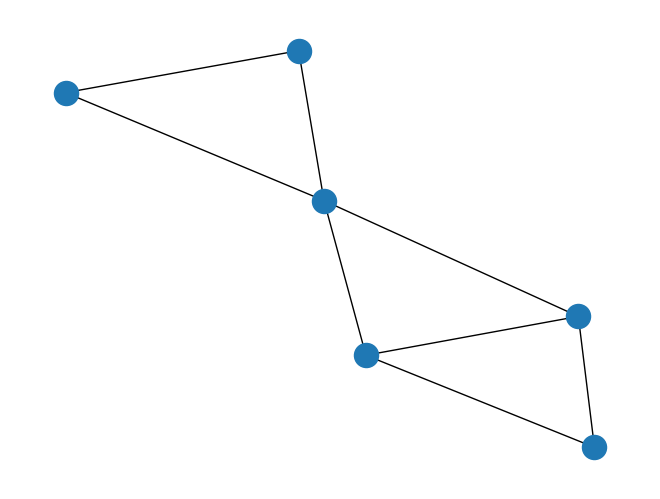

In [26]:
size = 6
R1 = aleatoire(size)
print(R1)
nx.draw(nx.from_numpy_array(R1))

[[0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0.]]


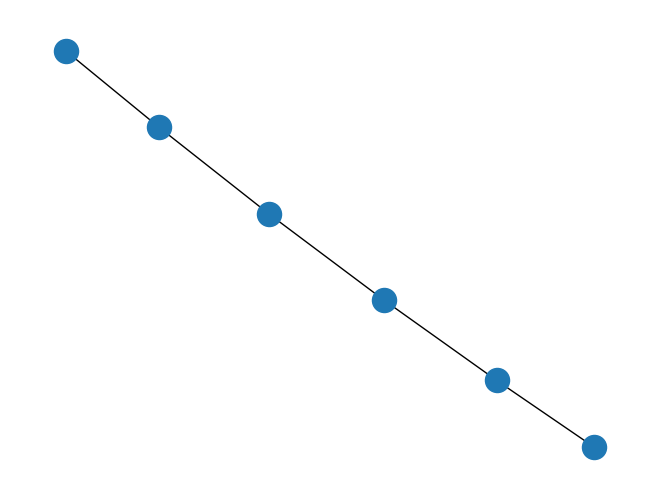

In [58]:
R2 = aleatoire(size)
print(R2)
nx.draw(nx.from_numpy_array(R2))

In [57]:
# Exemples : 
print(isomorphe(T,T),isomorphe(C,T),isomorphe(R1,R2),isomorphe(P,C))

True False False False


## <font color = silver> Recherches annexes sur l'isomorphisme </font>

<font color=red>voir http://www.numdam.org/article/M2AN_1969__3_3_51_0.pdf </font>
